##### Importing Pacakages


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

##### Checking numbers of values

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


##### Limiting values between 0 and 1

In [5]:
X_train = X_train / 255

X_test = X_test / 255

##### Display digits

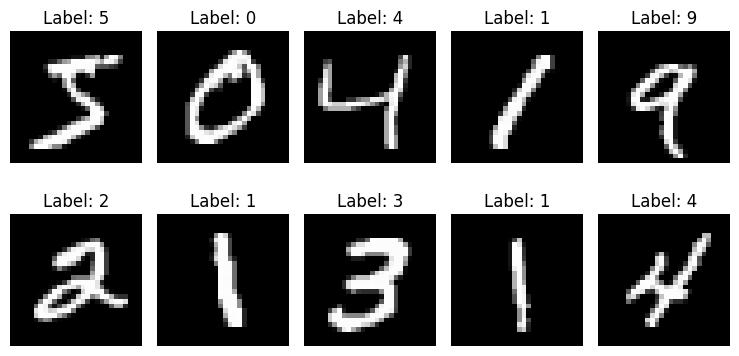

In [6]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

##### Train Model

In [7]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size=64, epochs=25,
          validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 6s 6ms/step - loss: 0.3631 - accuracy: 0.8926 - val_loss: 0.1532 - val_accuracy: 0.9553
Epoch 2/25
750/750 [==============================] - 6s 8ms/step - loss: 0.1530 - accuracy: 0.9543 - val_loss: 0.1152 - val_accuracy: 0.9652
Epoch 3/25
750/750 [==============================] - 5s 6ms/step - loss: 0.1065 - accuracy: 0.9678 - val_loss: 0.1024 - val_accuracy: 0.9688
Epoch 4/25
750/750 [==============================] - 4s 6ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0896 - val_accuracy: 0.9722
Epoch 5/25
750/750 [==============================] - 5s 7ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 6/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0898 - val_accuracy: 0.9740
Epoch 7/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0840 - val_accuracy: 0.9747
Epoch 

In [11]:
model.save('minst.h5')

e:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
model = tf.keras.models.load_model('minst.h5')

##### Testing Model

In [6]:
model.evaluate(X_test,y_test)

1875/1875 [==============================] - 6s 3ms/step - loss: 6.2739 - accuracy: 0.9945


[6.273890495300293, 0.9944833517074585]

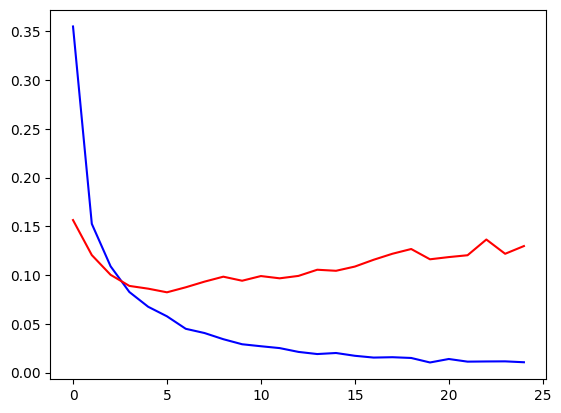

In [12]:
plt.plot(history.history['loss'], c='b')
plt.plot(history.history['val_loss'], c='r')

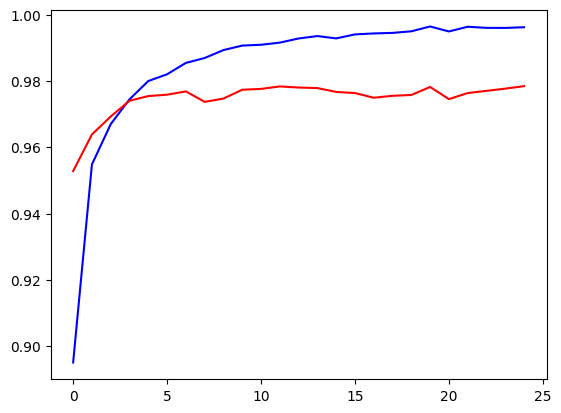

In [13]:
plt.plot(history.history['accuracy'], c='b')
plt.plot(history.history['val_accuracy'], c='r')

In [14]:
y_prob =  model.predict(X_test)
y_prob = y_prob.argmax(axis=1)
y_prob

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

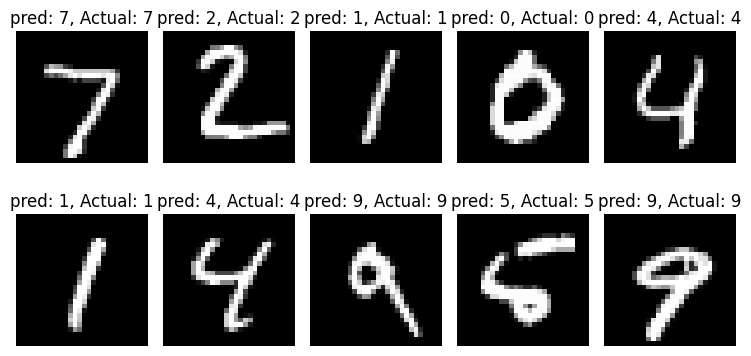

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f'pred: {y_prob[i]}, Actual: {y_test[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

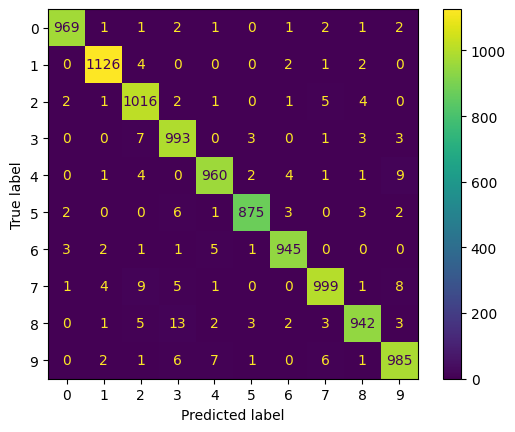

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_prob)
plt.show()